In [619]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score,recall_score,confusion_matrix
from sklearn import metrics
import itertools

In [620]:
df = pd.read_excel("/Users/anushka/Desktop/Data Science - Intern/trip.xlsx")
print(df.shape)
df.head()

(504, 20)


,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [621]:
adf=df.copy()
period=df['Period of stay'].unique()
period.sort()
print(period)

['Dec-Feb' 'Jun-Aug' 'Mar-May' 'Sep-Nov']


In [622]:
for i in range(504):
    if df.loc[i,'Period of stay']==period[0]:
        adf.loc[i,'Period of stay']=1
    elif df.loc[i,'Period of stay']==period[1]:
        adf.loc[i,'Period of stay']=2
    elif df.loc[i,'Period of stay']==period[2]:
        adf.loc[i,'Period of stay']=3
    else:
        adf.loc[i,'Period of stay']=4

In [623]:
ttype=df['Traveler type'].unique()
ttype.sort()
print(ttype)

['Business' 'Couples' 'Families' 'Friends' 'Solo']


In [624]:
for i in range(504):
    if df.loc[i,'Traveler type']==ttype[0]:
        adf.loc[i,'Traveler type']=1
    elif df.loc[i,'Traveler type']==ttype[1]:
        adf.loc[i,'Traveler type']=2
    elif df.loc[i,'Traveler type']==ttype[2]:
        adf.loc[i,'Traveler type']=3
    elif df.loc[i,'Traveler type']==ttype[3]:
        adf.loc[i,'Traveler type']=4
    else:
        adf.loc[i,'Traveler type']=5
        
ttype=adf['Traveler type'].unique()
ttype.sort()
print(ttype)

[1 2 3 4 5]


In [625]:
for i in range(504):
    if df.loc[i,'Swimming Pool']=='YES':
        adf.loc[i,'Swimming Pool']=1
    else:
        adf.loc[i,'Swimming Pool']=0

for i in range(504):
    if df.loc[i,'Exercise Room']=='YES':
        adf.loc[i,'Exercise Room']=1
    else:
        adf.loc[i,'Exercise Room']=0
        
for i in range(504):
    if df.loc[i,'Basketball Court']=='YES':
        adf.loc[i,'Basketball Court']=1
    else:
        adf.loc[i,'Basketball Court']=0

for i in range(504):
    if df.loc[i,'Yoga Classes']=='YES':
        adf.loc[i,'Yoga Classes']=1
    else:
        adf.loc[i,'Yoga Classes']=0
        
for i in range(504):
    if df.loc[i,'Club']=='YES':
        adf.loc[i,'Club']=1
    else:
        adf.loc[i,'Club']=0
        
for i in range(504):
    if df.loc[i,'Free Wifi']=='YES':
        adf.loc[i,'Free Wifi']=1
    else:
        adf.loc[i,'Free Wifi']=0

In [626]:
hotels = df['Hotel name'].unique()
hotels.sort()
len(hotels)

21

In [627]:
for i in range(504):
    if df.loc[i,'Hotel name']==hotels[0]:
        adf.loc[i,'Hotel name']=1
    elif df.loc[i,'Hotel name']==hotels[1]:
        adf.loc[i,'Hotel name']=2
    elif df.loc[i,'Hotel name']==hotels[2]:
        adf.loc[i,'Hotel name']=3
    elif df.loc[i,'Hotel name']==hotels[3]:
        adf.loc[i,'Hotel name']=4
    elif df.loc[i,'Hotel name']==hotels[4]:
        adf.loc[i,'Hotel name']=5
    elif df.loc[i,'Hotel name']==hotels[5]:
        adf.loc[i,'Hotel name']=6
    elif df.loc[i,'Hotel name']==hotels[6]:
        adf.loc[i,'Hotel name']=7
    elif df.loc[i,'Hotel name']==hotels[7]:
        adf.loc[i,'Hotel name']=8
    elif df.loc[i,'Hotel name']==hotels[8]:
        adf.loc[i,'Hotel name']=9
    elif df.loc[i,'Hotel name']==hotels[9]:
        adf.loc[i,'Hotel name']=10
    elif df.loc[i,'Hotel name']==hotels[10]:
        adf.loc[i,'Hotel name']=11
    elif df.loc[i,'Hotel name']==hotels[11]:
        adf.loc[i,'Hotel name']=12
    elif df.loc[i,'Hotel name']==hotels[12]:
        adf.loc[i,'Hotel name']=13
    elif df.loc[i,'Hotel name']==hotels[13]:
        adf.loc[i,'Hotel name']=14
    elif df.loc[i,'Hotel name']==hotels[14]:
        adf.loc[i,'Hotel name']=15
    elif df.loc[i,'Hotel name']==hotels[16]:
        adf.loc[i,'Hotel name']=17
    elif df.loc[i,'Hotel name']==hotels[17]:
        adf.loc[i,'Hotel name']=18
    elif df.loc[i,'Hotel name']==hotels[18]:
        adf.loc[i,'Hotel name']=19
    elif df.loc[i,'Hotel name']==hotels[19]:
        adf.loc[i,'Hotel name']=20
    else:
        adf.loc[i,'Hotel name']=21
        
ttype=adf['Hotel name'].unique()
ttype.sort()
print(ttype)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 21]


In [628]:
df['Hotel stars'].unique()
for i in range(504):
    if df.loc[i,'Hotel stars']=='3,5':
        adf.loc[i,'Hotel stars']=3
    elif df.loc[i,'Hotel stars']=='4,5':
        adf.loc[i,'Hotel stars']=4

In [629]:
continents=df['User continent'].unique()
continents.sort()
print(continents)

['Africa' 'Asia' 'Europe' 'North America' 'Oceania' 'South America']


In [630]:
for i in range(504):
    if df.loc[i,'User continent']==continents[0]:
        adf.loc[i,'User continent']=1
    elif df.loc[i,'User continent']==continents[1]:
        adf.loc[i,'User continent']=2
    elif df.loc[i,'User continent']==continents[2]:
        adf.loc[i,'User continent']=3
    elif df.loc[i,'User continent']==continents[3]:
        adf.loc[i,'User continent']=4
    elif df.loc[i,'User continent']==continents[4]:
        adf.loc[i,'User continent']=5
    else:
        adf.loc[i,'User continent']=6
        
continents=adf['User continent'].unique()
continents.sort()
print(continents)

[1 2 3 4 5 6]


In [631]:
for i in range(504):
    if df.loc[i,'Review month']=='January':
        adf.loc[i,'Review month']=1
    elif df.loc[i,'Review month']=='February':
        adf.loc[i,'Review month']=2
    elif df.loc[i,'Review month']=='March':
        adf.loc[i,'Review month']=3
    elif df.loc[i,'Review month']=='April':
        adf.loc[i,'Review month']=4
    elif df.loc[i,'Review month']=='May':
        adf.loc[i,'Review month']=5
    elif df.loc[i,'Review month']=='June':
        adf.loc[i,'Review month']=6
    elif df.loc[i,'Review month']=='July':
        adf.loc[i,'Review month']=7
    elif df.loc[i,'Review month']=='August':
        adf.loc[i,'Review month']=8
    elif df.loc[i,'Review month']=='September':
        adf.loc[i,'Review month']=9
    elif df.loc[i,'Review month']=='October':
        adf.loc[i,'Review month']=10
    elif df.loc[i,'Review month']=='November':
        adf.loc[i,'Review month']=11
    else:
        adf.loc[i,'Review month']=12
        
for i in range(504):
    if df.loc[i,'Review weekday']=='Monday':
        adf.loc[i,'Review weekday']=1
    elif df.loc[i,'Review weekday']=='Tuesday':
        adf.loc[i,'Review weekday']=2
    elif df.loc[i,'Review weekday']=='Wednesday':
        adf.loc[i,'Review weekday']=3
    elif df.loc[i,'Review weekday']=='Thursday':
        adf.loc[i,'Review weekday']=4
    elif df.loc[i,'Review weekday']=='Friday':
        adf.loc[i,'Review weekday']=5
    elif df.loc[i,'Review weekday']=='Saturday':
        adf.loc[i,'Review weekday']=6
    else:
        adf.loc[i,'Review weekday']=7

continents=adf['Review month'].unique()
continents.sort()
print(continents)

continents=adf['Review weekday'].unique()
continents.sort()
print(continents)

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[1 2 3 4 5 6 7]


In [632]:
adf.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Swimming Pool,Exercise Room,Basketball Court,Yoga Classes,Club,Free Wifi,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,1,4,0,1,0,0,1,1,3,3,3773,4,9,1,4
1,USA,119,21,75,3,1,1,0,1,0,0,1,1,3,3,3773,4,3,1,5
2,USA,36,9,25,5,3,3,0,1,0,0,1,1,3,3,3773,4,2,2,6
3,UK,14,7,14,4,3,4,0,1,0,0,1,1,3,3,3773,3,6,2,5
4,Canada,5,5,2,4,3,5,0,1,0,0,1,1,3,3,3773,4,7,3,2


In [633]:
X = adf[['Nr. reviews','Nr. hotel reviews','Helpful votes','Period of stay','Traveler type','Swimming Pool','Exercise Room','Basketball Court','Yoga Classes','Club','Free Wifi','Hotel name','Hotel stars','Nr. rooms','User continent','Member years','Review month','Review weekday']]
y = adf['Score']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X.shape

(504, 18)

In [634]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure()
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [635]:
def Logreg():
    model = LogisticRegression(C=0.81)
    model.fit(X_train,y_train)
    sc = model.score(X_test,y_test)
    print("Accuracy: "+str(sc))
    pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,3,4,5])
    plot_confusion_matrix(cm, classes=[1,2,3,4,5])
    return sc#,ps,rs

Accuracy: 0.46107784431137727
[[ 0  0  0  1  2]
 [ 0  0  0  3  7]
 [ 0  0  1  5 12]
 [ 0  0  5 16 44]
 [ 1  0  1  9 60]]


0.46107784431137727

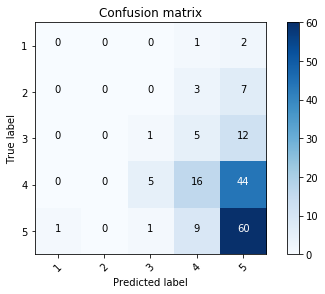

In [636]:
Logreg()

In [637]:
def RForest():
    model = RandomForestClassifier(max_depth=20, random_state=0, n_estimators=400)
    model.fit(X_train,y_train)
    sc = model.score(X_test,y_test)
    print("Accuracy: "+str(sc))    
    pred = model.predict(X_test)
    feature=[]
    imp=[]
    
    for i, j in sorted(zip(X_train.columns, model.feature_importances_)):
        feature.append(i)
        imp.append(j)
 
    cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,3,4,5])
    plot_confusion_matrix(cm, classes=[1,2,3,4,5])
    
    plt.figure()
    index = np.arange(len(feature))
    plt.bar(index,imp)
    plt.xlabel('Features', fontsize=10)
    plt.ylabel('Importance', fontsize=10)
    plt.xticks(index, feature, fontsize=10, rotation=90)
    plt.title('Feature importance')
    plt.show()   
    
    return sc#,ps,rs

Accuracy: 0.47904191616766467
[[ 0  1  0  1  1]
 [ 0  0  1  2  7]
 [ 0  0  2  6 10]
 [ 0  0 12 25 28]
 [ 0  1  0 17 53]]


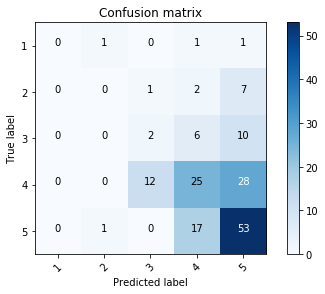

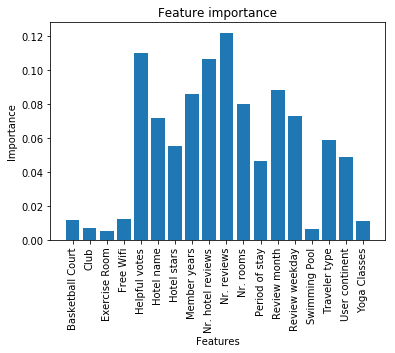

0.47904191616766467

In [638]:
RForest()

In [639]:
def VectMachine():
    model = SVC(C=100, gamma=0.042)
    model.fit(X_train, y_train)
    sc = model.score(X_test,y_test)
    print("Accuracy: "+str(sc))
    pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,3,4,5])
    plot_confusion_matrix(cm, classes=[1,2,3,4,5])
    return sc#,ps,rs

Accuracy: 0.4491017964071856
[[ 0  0  0  0  3]
 [ 0  0  0  0 10]
 [ 0  0  0  0 18]
 [ 0  0  0  4 61]
 [ 0  0  0  0 71]]


0.4491017964071856

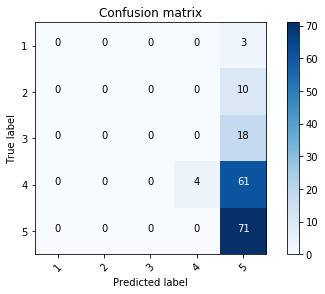

In [640]:
VectMachine()

In [641]:
def KNN():
    n = KNeighborsClassifier(n_neighbors=15)
    n.fit(X_train, y_train) 
    sc4 = n.score(X_test,y_test)
    print("Accuracy: "+str(sc4))
    pred = n.predict(X_test)
    cm = metrics.confusion_matrix(y_test, pred, labels=[1,2,3,4,5])
    plot_confusion_matrix(cm, classes=[1,2,3,4,5])
    return sc4

Accuracy: 0.4550898203592814
[[ 0  0  1  0  2]
 [ 0  0  2  1  7]
 [ 0  0  4  4 10]
 [ 0  0  7 20 38]
 [ 0  0  3 16 52]]


0.4550898203592814

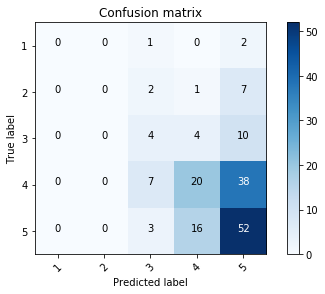

In [642]:
KNN()

In [643]:
def MaxVoting():
    model1 = KNeighborsClassifier(n_neighbors=15)
    model2 = LogisticRegression(C=0.81)
    model3 = SVC(C=100, gamma=0.042)
    model4 = RandomForestClassifier(max_depth=20, random_state=0, n_estimators=400)
    
    model1.fit(X_train,y_train)
    model2.fit(X_train,y_train)
    model3.fit(X_train,y_train)
    model4.fit(X_train,y_train)
    
    pred1=model1.predict(X_test)
    pred2=model2.predict(X_test)
    pred3=model3.predict(X_test)
    pred4=model4.predict(X_test)
    
    y_test1 = np.array(y_test)
    final_pred = np.array([])
    
    print("Taking Logistic Regression, SVC, and Random Forests")
    count=0
    for i in range(0,len(X_test)):
        final_pred = np.append(final_pred, statistics.mean([pred2[i],pred3[i],pred4[i]]))
    for i in range(len(final_pred)):
        if final_pred[i]==y_test1[i]:
            count+=1
    sc1=count/(i)
    print(sc1)
    cm = metrics.confusion_matrix(y_test, final_pred, labels=[1,2,3,4,5])
    plot_confusion_matrix(cm, classes=[1,2,3,4,5])
    

Taking Logistic Regression, SVC, and Random Forests
0.5301204819277109
[[ 0  0  1  1  1]
 [ 0  0  0  3  7]
 [ 0  0  1  8  9]
 [ 0  0  4 37 24]
 [ 0  0  1 20 50]]


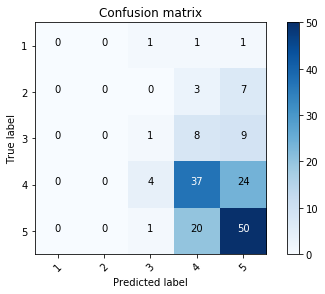

In [644]:
MaxVoting()

In [645]:
model = BaggingClassifier(KNeighborsClassifier(n_neighbors=15),n_estimators=30,warm_start=True)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.4311377245508982

In [646]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(SVC(C=100, gamma=0.042),random_state=0)
model.fit(X_train, y_train)
model.score(X_test,y_test)

TypeError: AdaBoostClassifier with algorithm='SAMME.R' requires that the weak learner supports the calculation of class probabilities with a predict_proba method.
Please change the base estimator or set algorithm='SAMME' instead.